In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.compiler import transpile
import numpy as np


# u = Operator([[0, 0, 1, 0, 0, 0, 0, 0],
#               [1, 0, 0, 0, 0, 0, 0, 0],
#               [0, 1, 0, 0, 0, 0, 0, 0],
#               [0, 0, 0, 1, 0, 0, 0, 0],
#               [0, 0, 0, 0, 0, 0, 0, 1],
#               [0, 0, 0, 0, 0, 1, 0, 0],
#               [0, 0, 0, 0, 0, 0, 1, 0],
#               [0, 0, 0, 0, 1, 0, 0, 0]])

qc = QuantumCircuit(1)
# qc.unitary(u, [0,1,2], label='u')
qc.rx(0.8, 0)
# qc.ccx(0,1,2)

# basis_gates = ['cx', 's', 'sdg', 'h', 't', 'tdg']
# basis_gates = ['rx', 'ry', 'rz', 'p', 'cx']
transpiled = transpile(qc, basis_gates=["t", "tdg", "h"], optimization_level=3, unitary_synthesis_method='sk')
display(transpiled.draw('mpl'))

TranspilerError: "Unable to translate the operations in the circuit: ['rx'] to the backend's (or manually specified) target basis: ['t', 'reset', 'h', 'barrier', 'measure', 'tdg', 'delay', 'snapshot']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.BasisTranslator.html#translation_errors"

Original circuit:


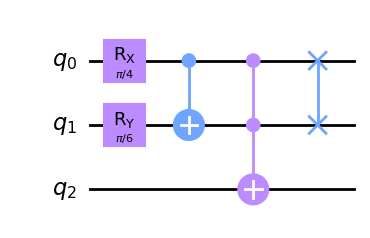

Discretized circuit:


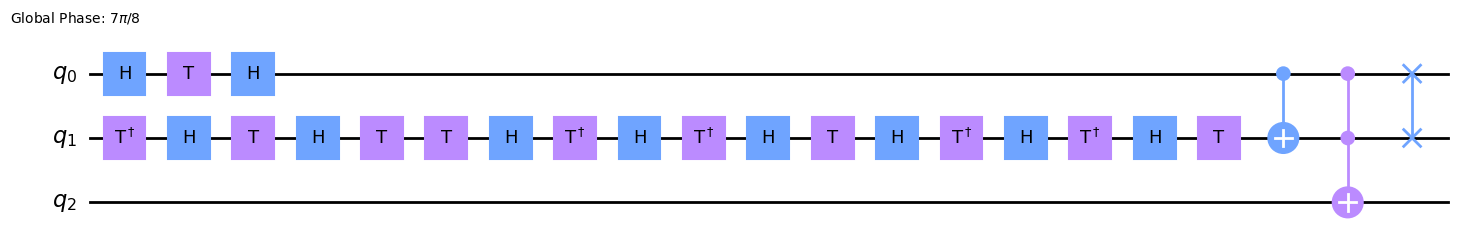

Error: 5.6526792565763255


In [10]:
import numpy as np
from qiskit.circuit import QuantumCircuit
# from qiskit.transpiler.passes.synthesis import SolovayKitaev
from qiskit.synthesis import generate_basic_approximations
from qiskit.transpiler.passes import SolovayKitaev
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(3)
circuit.rx(np.pi/4, 0)
circuit.ry(np.pi/6, 1)
circuit.cx(0, 1)
circuit.ccx(0,1,2)
circuit.swap(0,1)

print("Original circuit:")
display(circuit.draw('mpl'))

# skd = SolovayKitaev(recursion_degree=2)
basis = ["s", "sdg", "t", "tdg", "h"]
approx = generate_basic_approximations(basis, depth=3)

skd = SolovayKitaev(recursion_degree=2, basic_approximations=approx)

discretized = skd(circuit)

print("Discretized circuit:")
display(discretized.draw('mpl'))

print("Error:", np.linalg.norm(Operator(circuit).data - Operator(discretized).data))

In [36]:
#########   Givens rotation module   ############
import numpy as np

#########   Perform QR decomposition using Givens rotation   ############

def givens_rotation(A):

    (num_rows, num_cols) = np.shape(A)
    
    # Initialize Q,R
    # Q = orthogonal matrix
    # R =  upper triangular matrix
    Q = np.identity(num_rows)
    R = np.copy(A)

    # Iterate over lower triangular matrix.
    # (rows, cols) = np.tril_indices(num_rows, -1, num_cols)
    (rows, cols) = np.array([3, 2, 1]), np.array([0, 0, 0])
    # print(rows, cols)

    for (row, col) in zip(rows, cols):

        # Compute Givens rotation matrix and
        # zero-out lower triangular matrix entries.
        if R[row, col] != 0:
            (c, s) = Givens_Rotation_Matrix_Entries(R[col, col], R[row, col])

            G = np.identity(num_rows)
            G[[col, row], [col, row]] = c
            G[row, col] = -s
            G[col, row] = s

            R = np.dot(G, R)
            Q = np.dot(Q, G.T)
            print('G', G)
            A = np.matmul(G, A)
            print('F', A)

    return (Q, R)

##### Compute matrix entries for Givens rotation. #####

def Givens_Rotation_Matrix_Entries(a, b):
    r = np.sqrt(a**2 + b**2)
    c = a/r
    s = -b/r

    return (c, s)

# A = np.array([
#     [6,5,0],
#     [5,1,4],
#     [0,4,3]
# ])

A = 0.5*np.array([
    [1, 1, 1, 1],
    [1, 1j, -1, -1j],
    [1, -1, 1, -1],
    [1, -1j, -1, 1j],
])

# A = np.array([
#     [1/2, 1/(2 )]
# ])

(Q, R) = givens_rotation(A)

print('Q', Q)
print('R', R)

G [[ 0.70710678  0.          0.         -0.70710678]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.70710678  0.          0.          0.70710678]]
F [[ 0.        +0.j          0.35355339+0.35355339j  0.70710678+0.j
   0.35355339-0.35355339j]
 [ 0.5       +0.j          0.        +0.5j        -0.5       +0.j
   0.        -0.5j       ]
 [ 0.5       +0.j         -0.5       +0.j          0.5       +0.j
  -0.5       +0.j        ]
 [ 0.70710678+0.j          0.35355339-0.35355339j  0.        +0.j
   0.35355339+0.35355339j]]
G [[ 0.  0. -1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
F [[-0.5       +0.j          0.5       +0.j         -0.5       +0.j
   0.5       +0.j        ]
 [ 0.5       +0.j          0.        +0.5j        -0.5       +0.j
   0.        -0.5j       ]
 [ 0.        +0.j          0.35355339+0.35355339j  0.70710678+0.j
   0.35355339-0.35355339j]
 [ 0.70710678+0.j          0.35355339-0.35355339j  0.     

C:\Users\Rishi Vora\AppData\Local\Temp\ipykernel_25796\3239379324.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  G[[col, row], [col, row]] = c
C:\Users\Rishi Vora\AppData\Local\Temp\ipykernel_25796\3239379324.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  G[row, col] = -s
C:\Users\Rishi Vora\AppData\Local\Temp\ipykernel_25796\3239379324.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  G[col, row] = s


In [46]:
import numpy as np

U = 0.5*np.array([
    [1, 1, 1, 1],
    [1, 1j, -1, -1j],
    [1, -1, 1, -1],
    [1, -1j, -1, 1j],
])

d = len(U)

G = np.identity(d)

row, col = 3, 4
a = U[3, 0]
b = U[2, 0]
r = np.sqrt(a**2 + b**2)

G 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
